In [1]:
import numpy as np
from scipy import stats
from scipy import signal
import math
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.ndimage import gaussian_filter1d

In [2]:
from fly2p_function_TQ.imaging_2p_fixed_heading_period_analysis_single_ROI import run_fixed_heading_period_analysis_across_trial_single_ROI,process_signal_speed_correlation_single_ROI,correaltion_across_speed_range
from fly2p_function_TQ.imaging_2p_fixed_heading_period_analysis import plot_stopping_period_signal

In [3]:
# run_vonMises_fitting = 0
stable_PVA_threshold = 67.5
genotype = 'Exr6>7b'
celltype = 'ExR6-syt7f'
trial_condition = 'dark'
Signal_stopping_duration = 10
#200ms bin size
bump_amplitude_stopping_bin_size = 0.2
active_period_before_len =1

In [4]:
data = run_fixed_heading_period_analysis_across_trial_single_ROI('/home/tianhaoqiu/Documents/GitHub/2p_analysis/preprocessing_output/normalized/ExR6/ExR6_syt7f/dark',0,genotype,trial_condition,Signal_stopping_duration)

In [5]:
data

{'stopping_Angular_Speed_pooled':            0          1          2           3          4          5    
 0   15.790661  62.682108   4.118730  190.589234   1.033429  53.506144  \
 1   46.521776   1.839009   5.549159   49.104033   8.673255  65.038623   
 2    7.599000  41.824914  18.436054   19.645494  52.705317  22.417567   
 3   10.909744  72.009153  30.895626   20.383052  24.467921  53.787803   
 4   21.883754  86.858593  14.498036   62.243710  33.936626  30.305931   
 5    9.549671   1.254567   6.691386    5.085286   9.407913   4.094838   
 6    1.196255   1.193747   7.043581    1.020881   5.441125   1.852506   
 7   10.999782   0.746383   5.816305    0.628369   2.611660   5.073961   
 8    5.771947   0.510196   5.329090    6.084685   5.535768   1.725246   
 9    0.608110   0.733386   5.752788    9.260900   2.591891   1.390608   
 10   0.170615   1.135595   3.680481    5.518221   3.296413   2.562639   
 11   0.984345   1.065620   2.078620    5.395678   5.436860   2.596629   
 12  

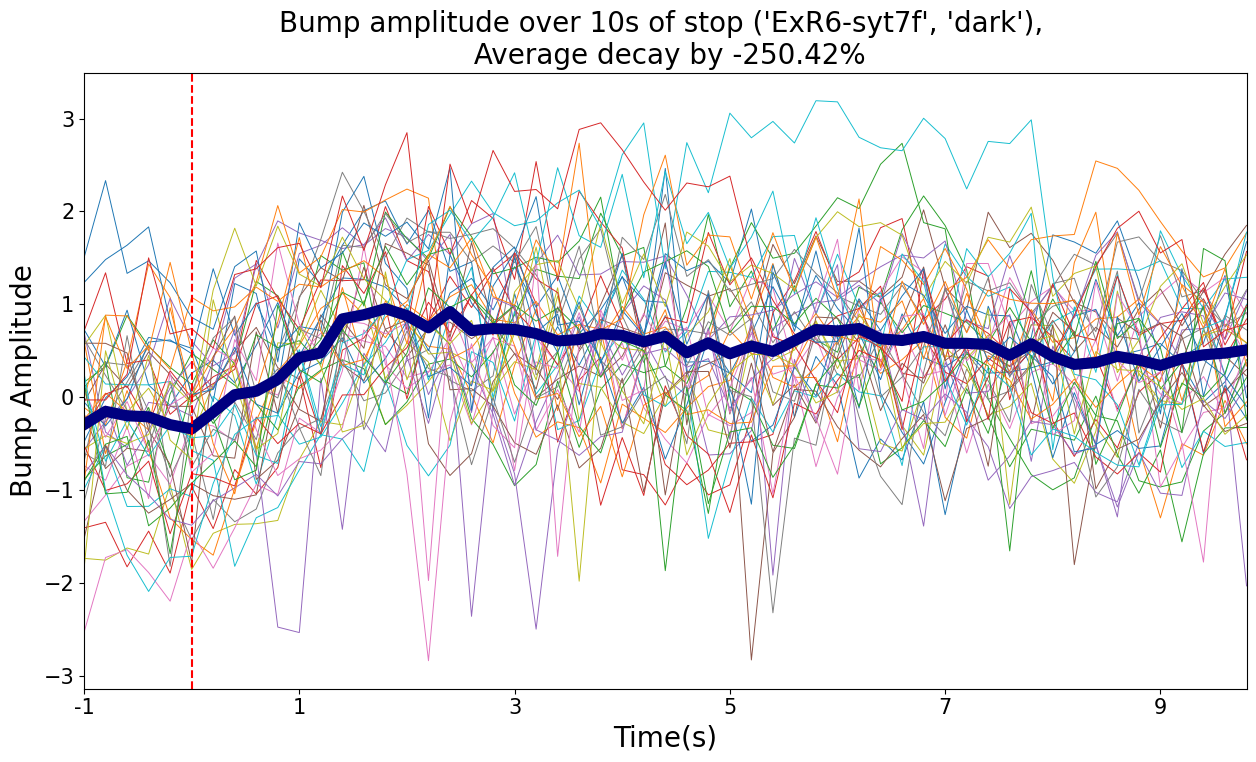

In [6]:
plot_stopping_period_signal(data['stopping_period_z_bg_subtracted_pooled'],stopping_bin_size_s=0.2 ,decay_start_from_exact_stop=1,decay_length_s=Signal_stopping_duration ,active_period_length_s=active_period_before_len,run_spline_fit=False,celltype=celltype, trial_condition=trial_condition)

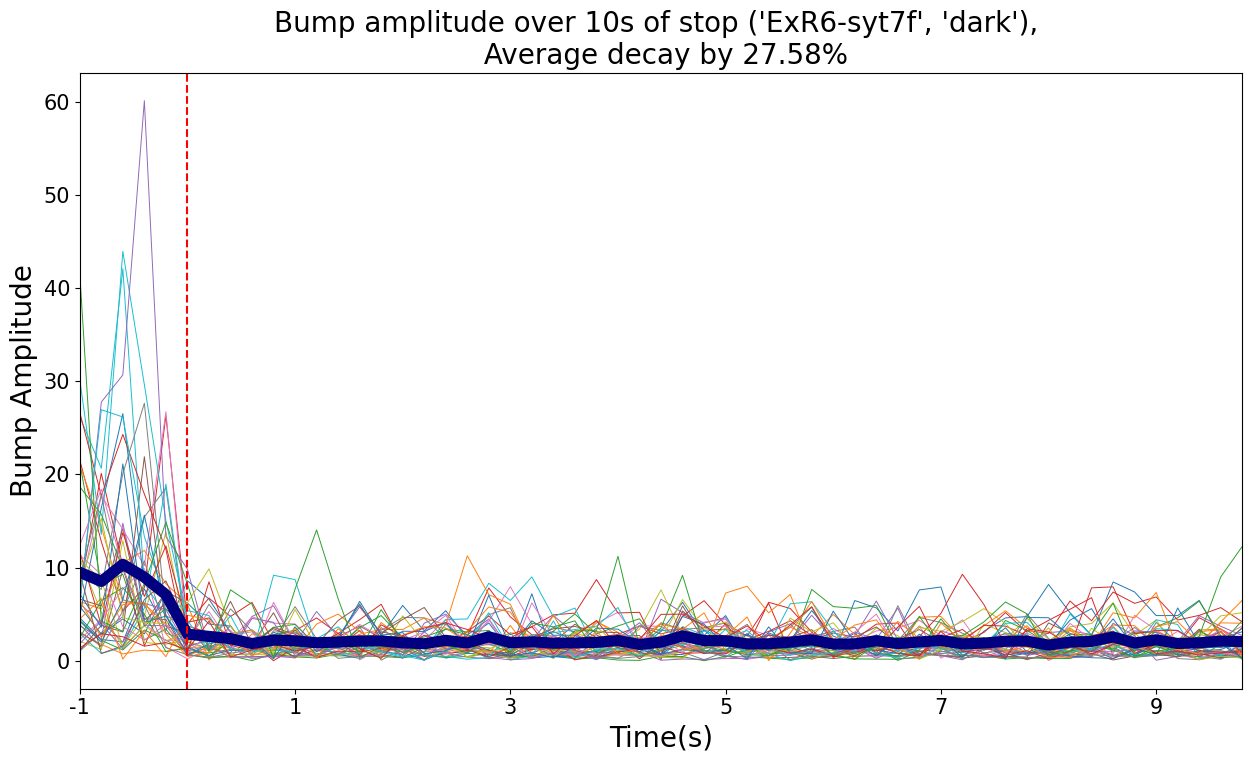

In [7]:
plot_stopping_period_signal(data['stopping_Forward_Speed_pooled'],stopping_bin_size_s=0.2 ,decay_start_from_exact_stop=1,decay_length_s=Signal_stopping_duration ,active_period_length_s=active_period_before_len,run_spline_fit=False,celltype=celltype, trial_condition=trial_condition)

In [28]:
speed_correlation_data = process_signal_speed_correlation_single_ROI('/home/tianhaoqiu/Documents/GitHub/2p_analysis/preprocessing_output/normalized/ExR6/ExR6_syt7f/dark', lag_duration = -0.3)

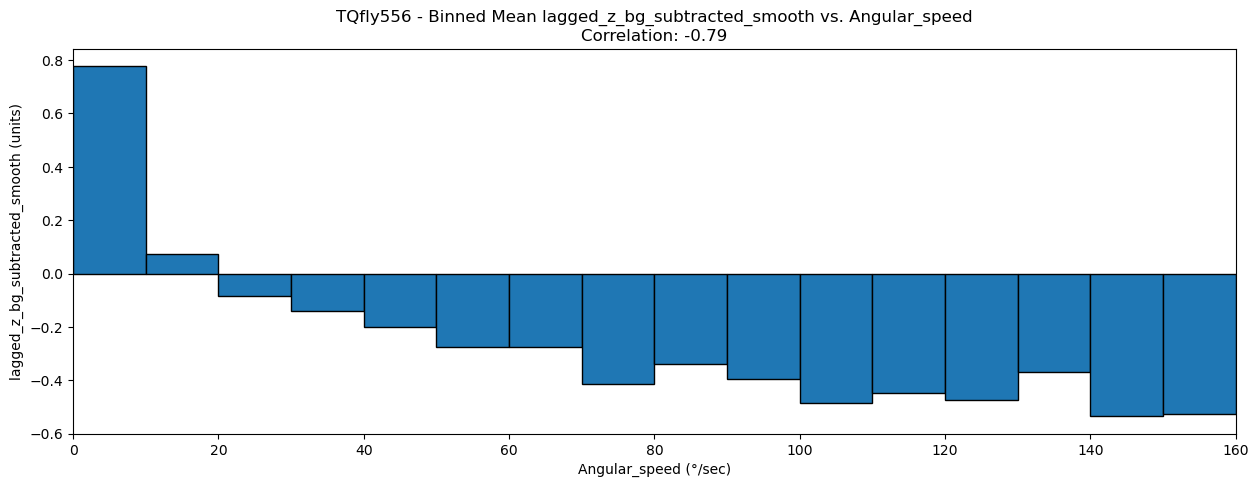

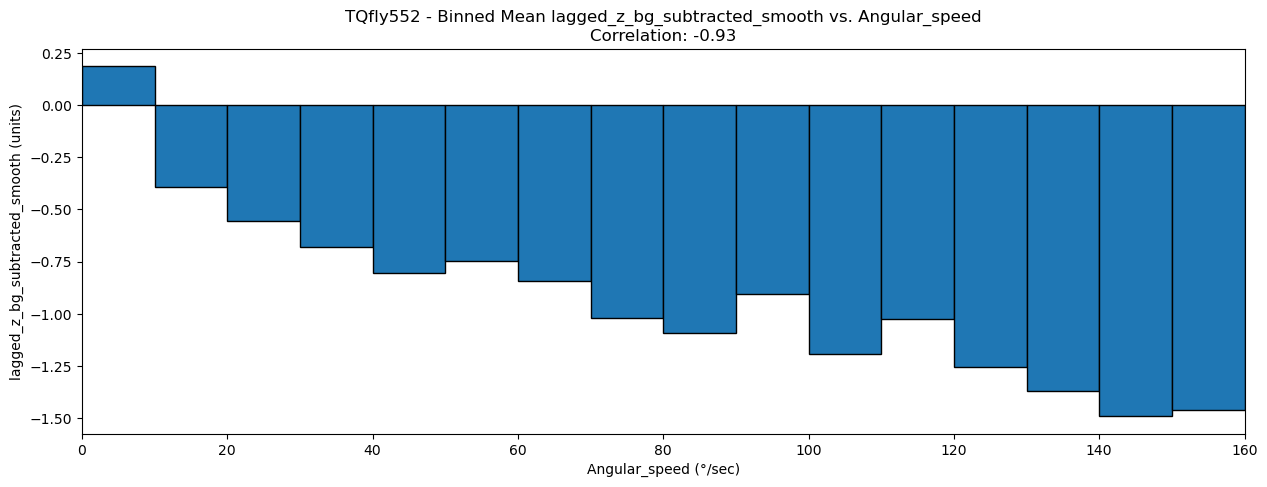

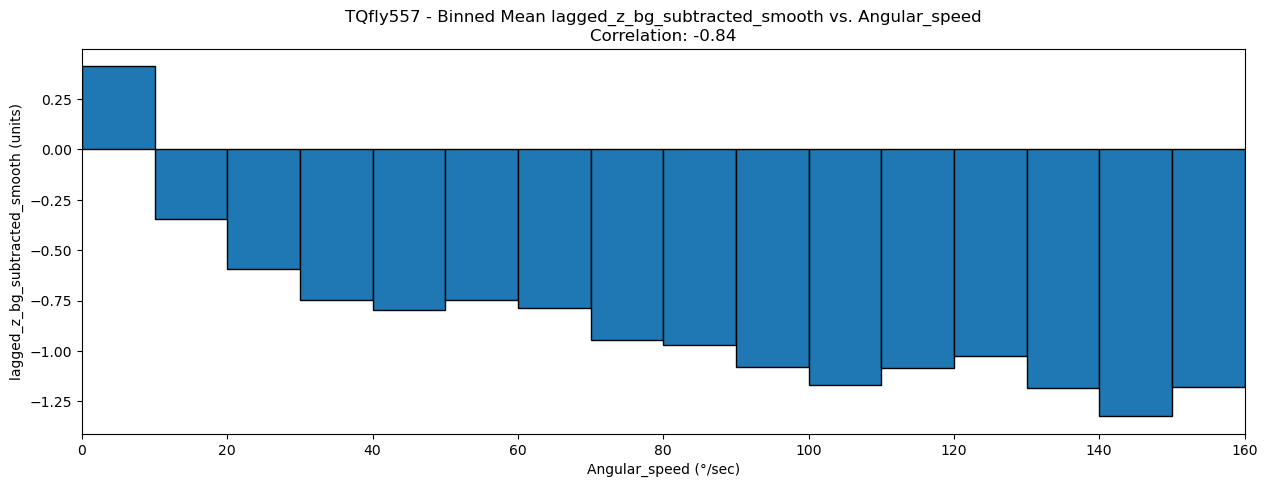

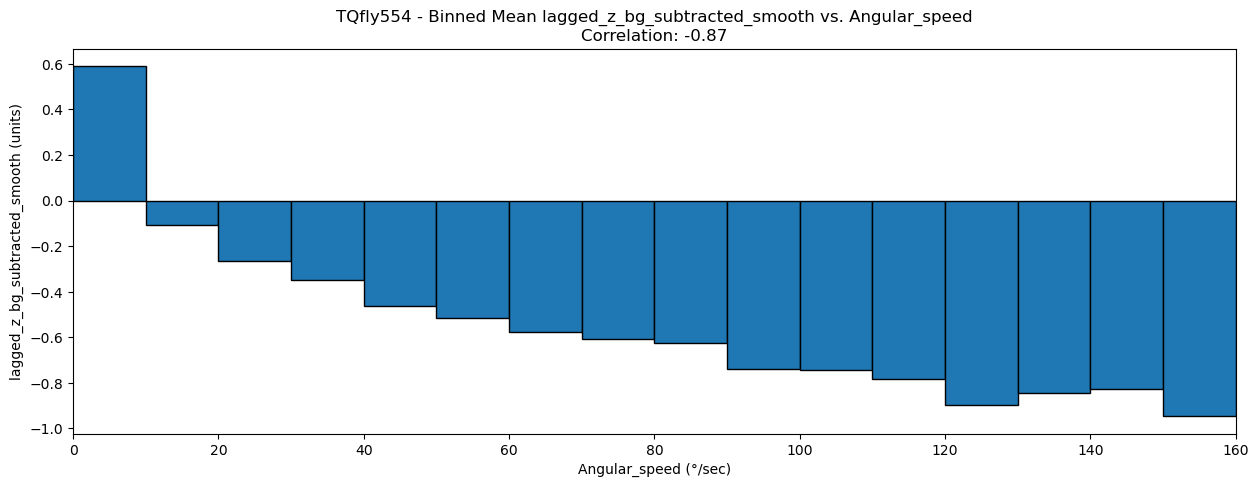

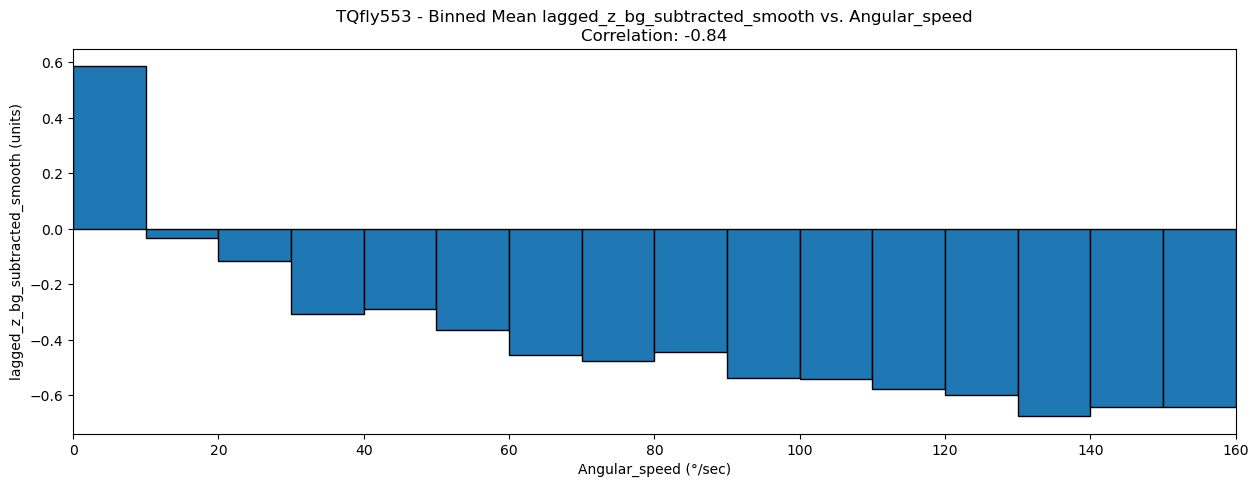

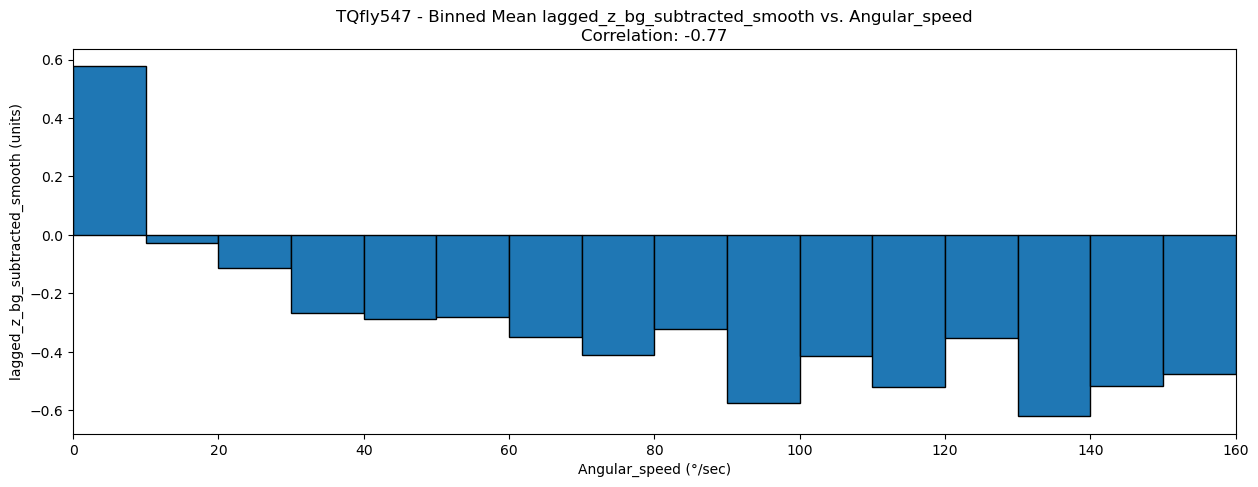

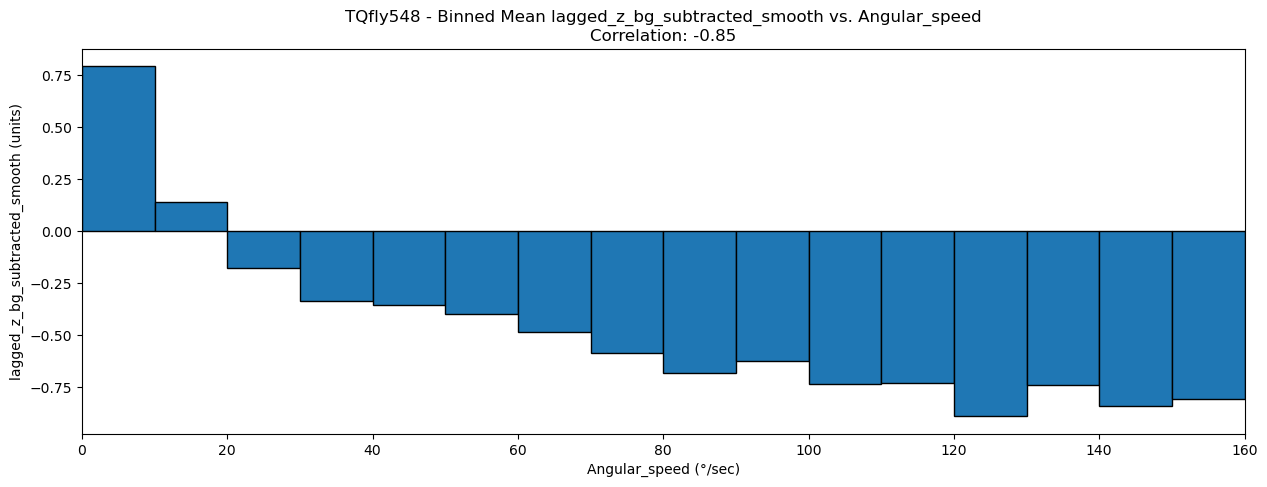

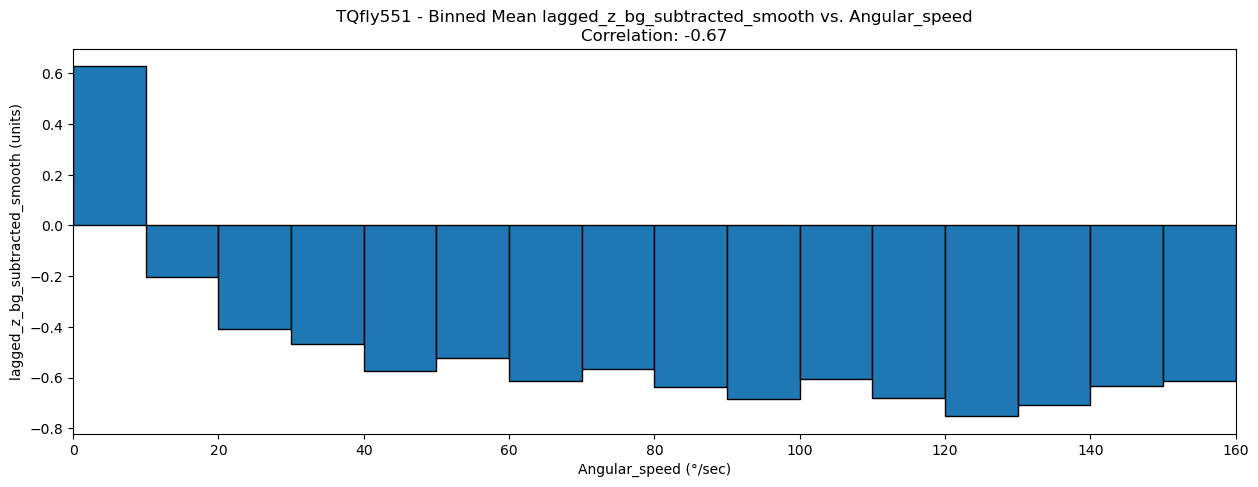

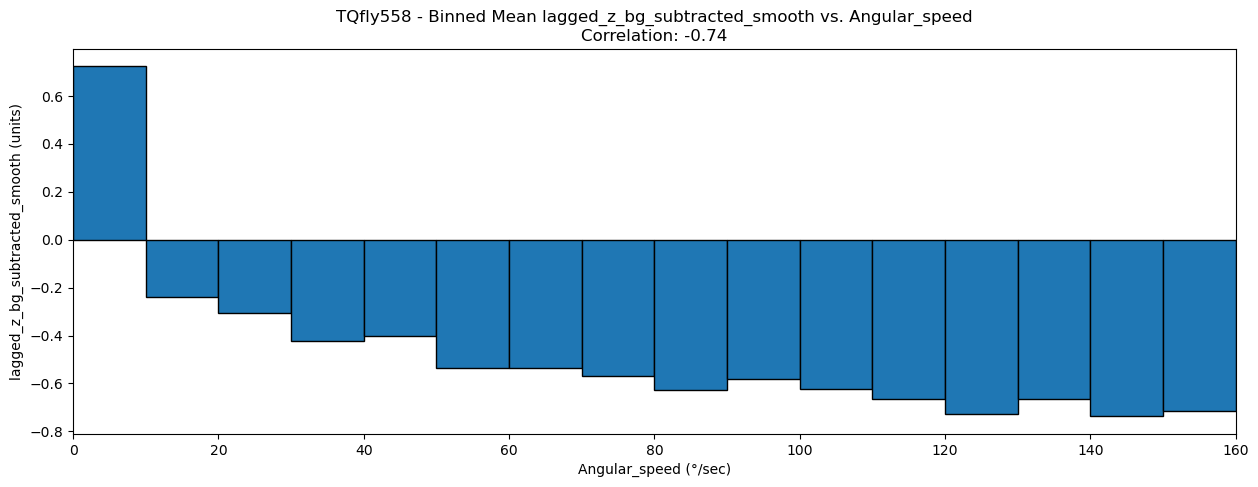

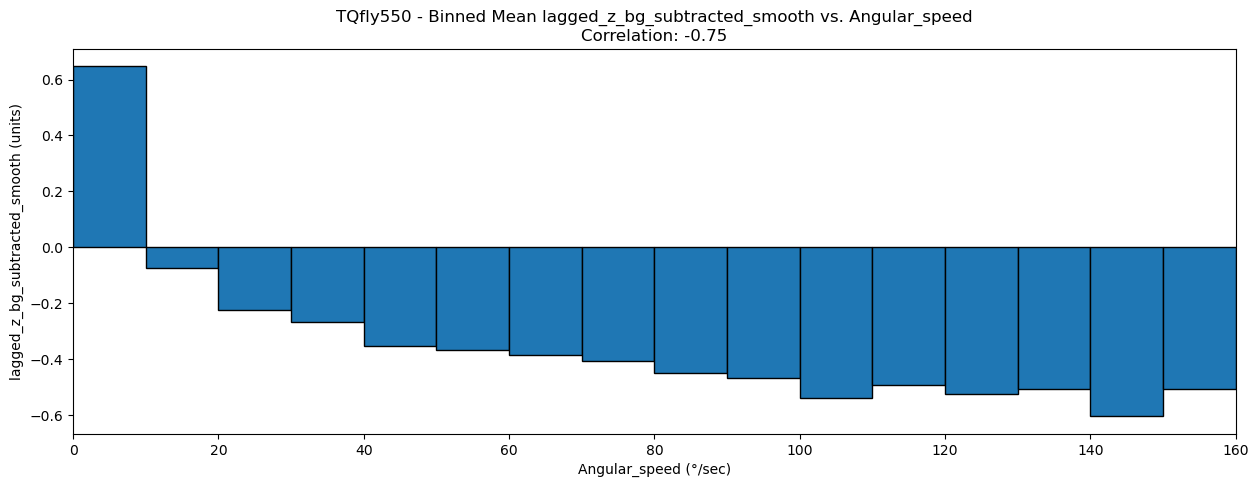

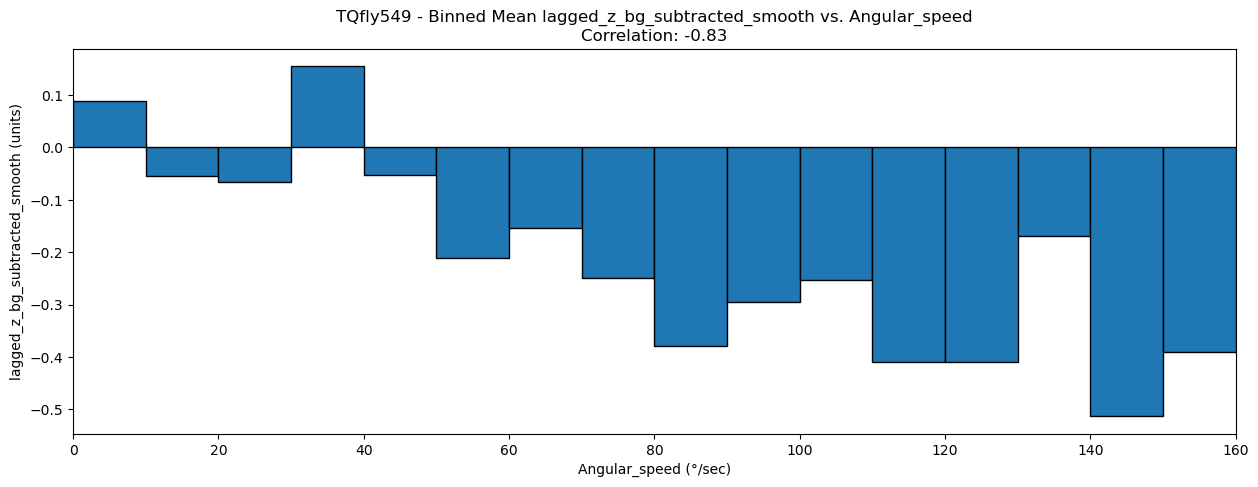

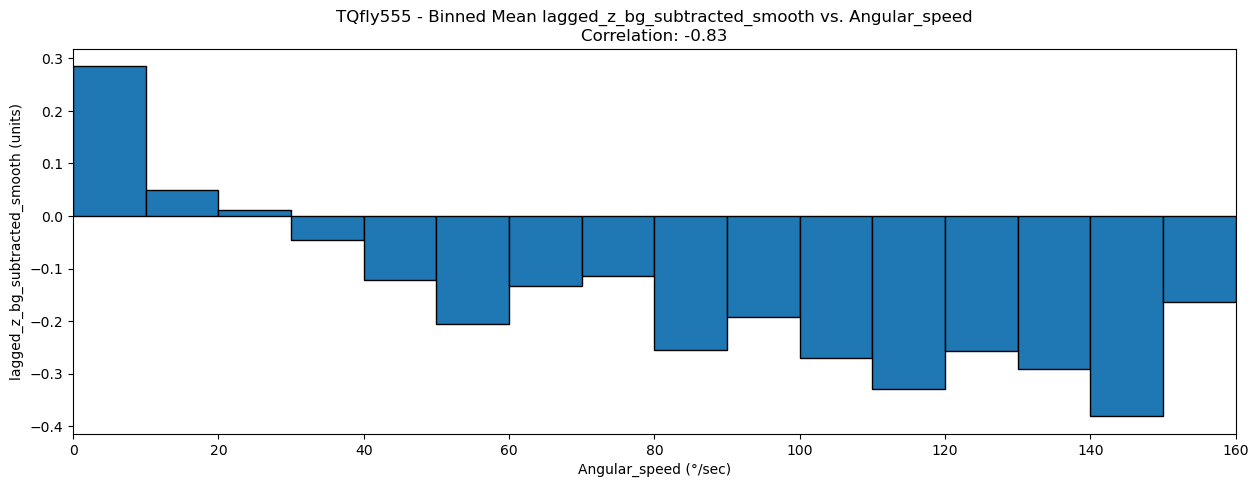

In [29]:
binned_results_df_angular = correaltion_across_speed_range(speed_correlation_data, bin_Width=10, bin_Edges_low=0, bin_Edges_up=160,x_column = 'Angular_speed',y_column='lagged_z_bg_subtracted_smooth')

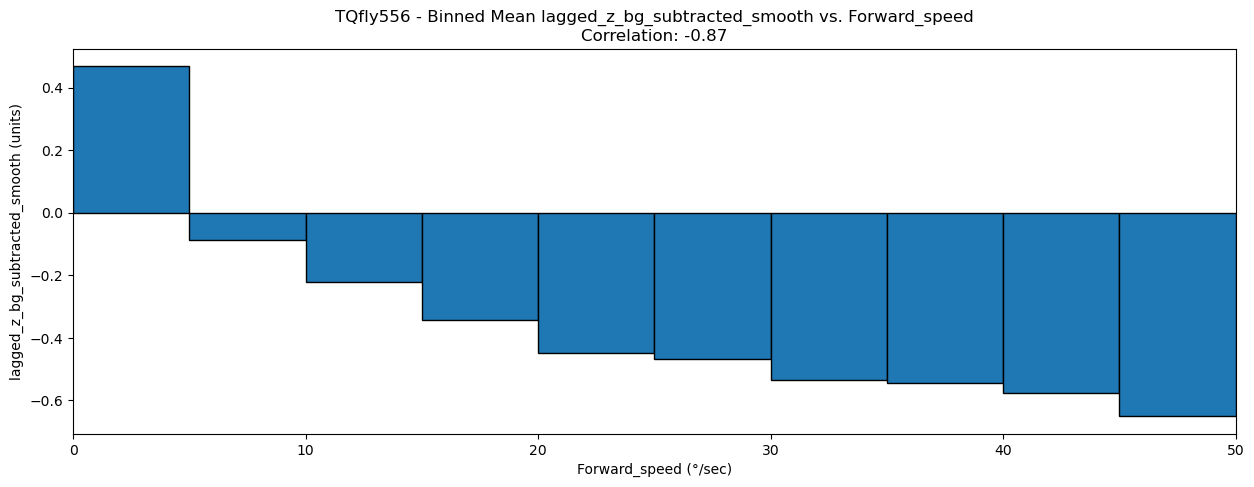

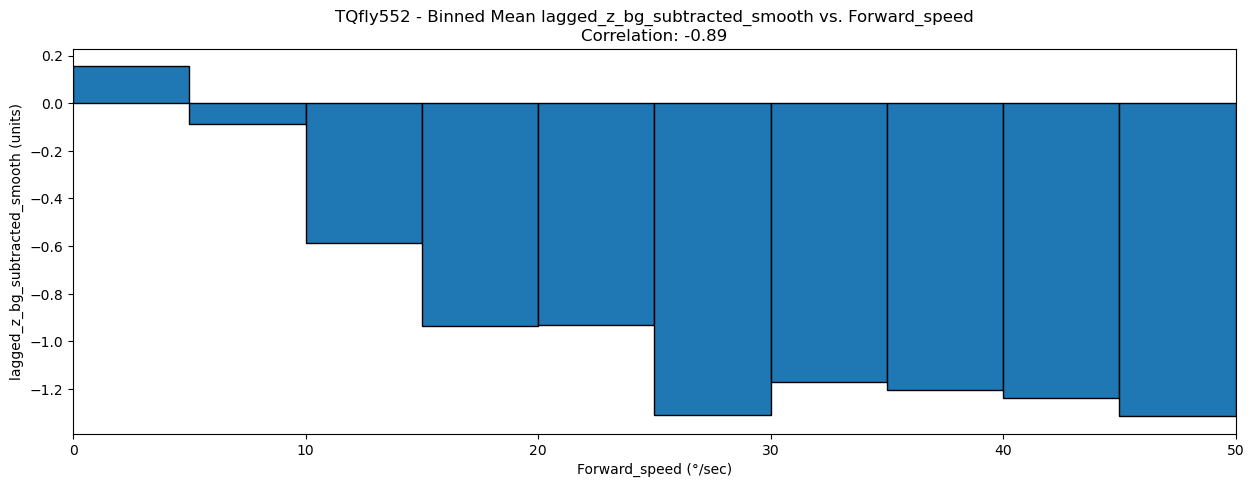

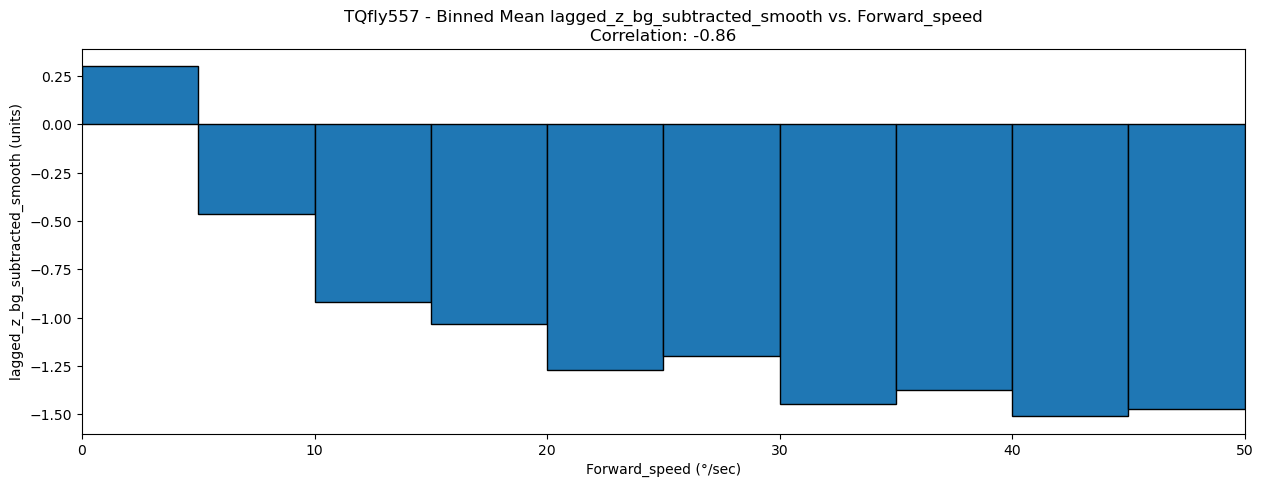

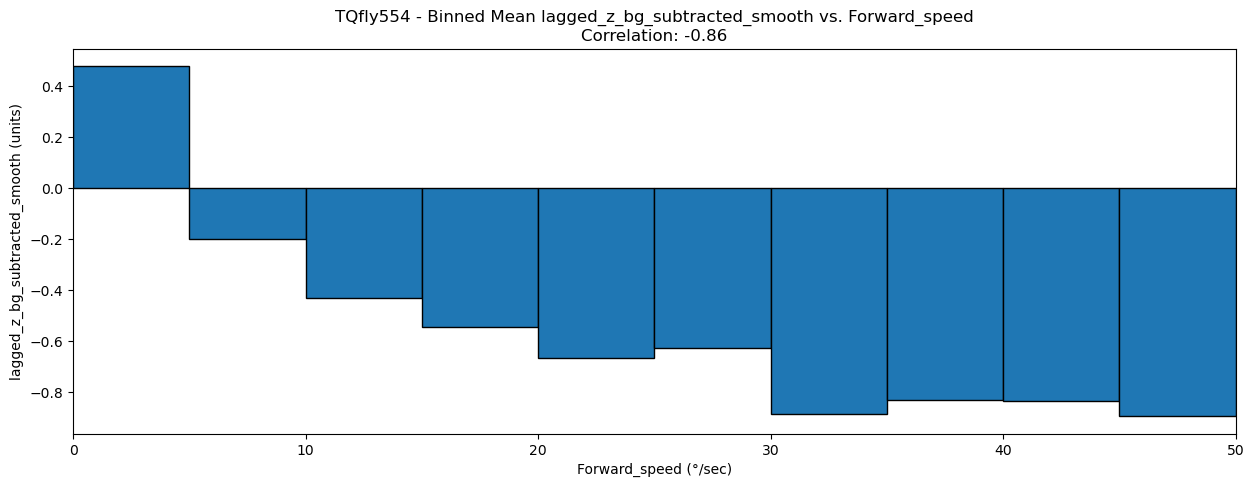

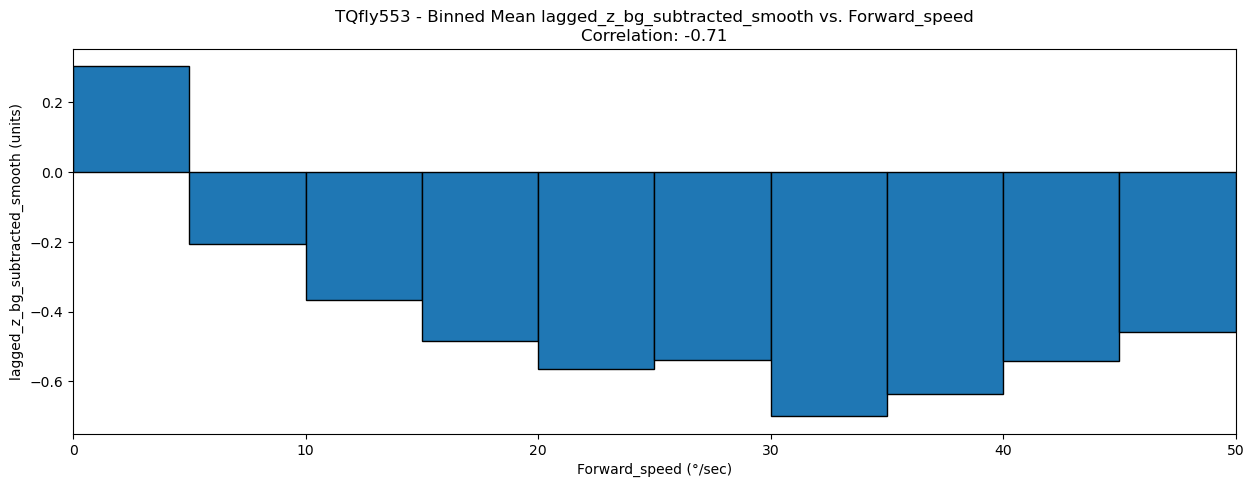

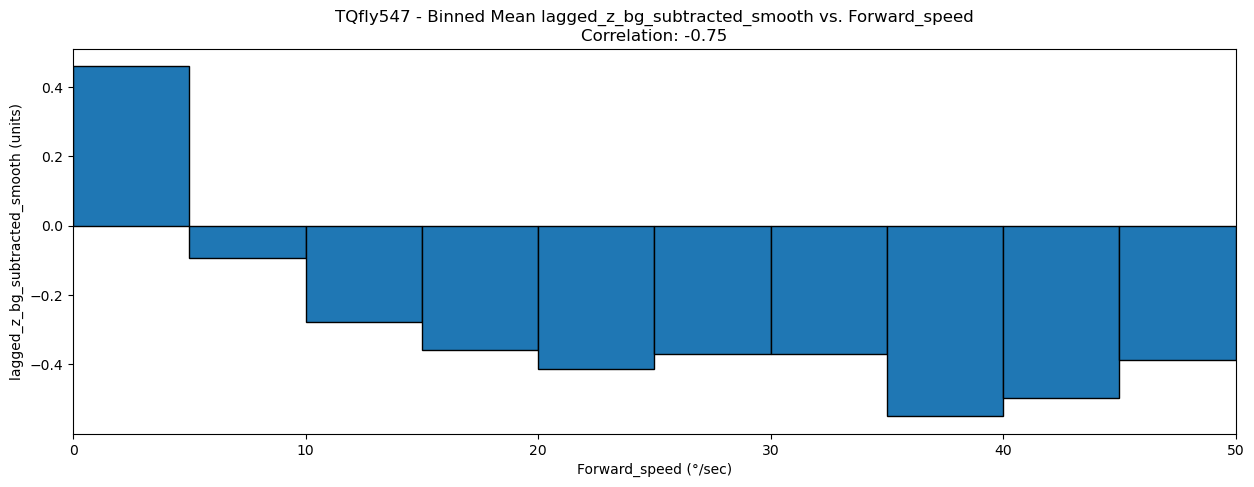

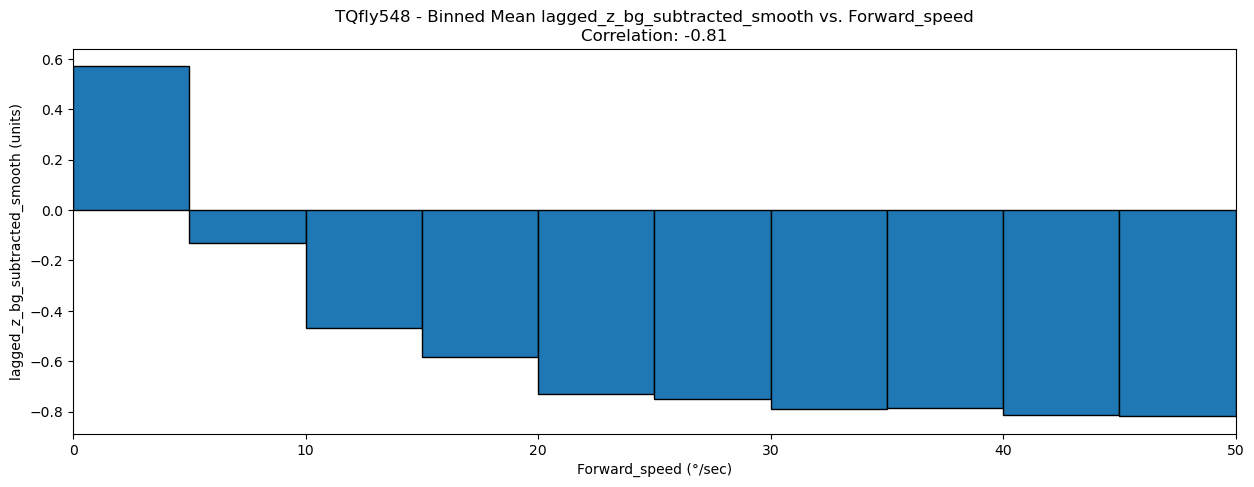

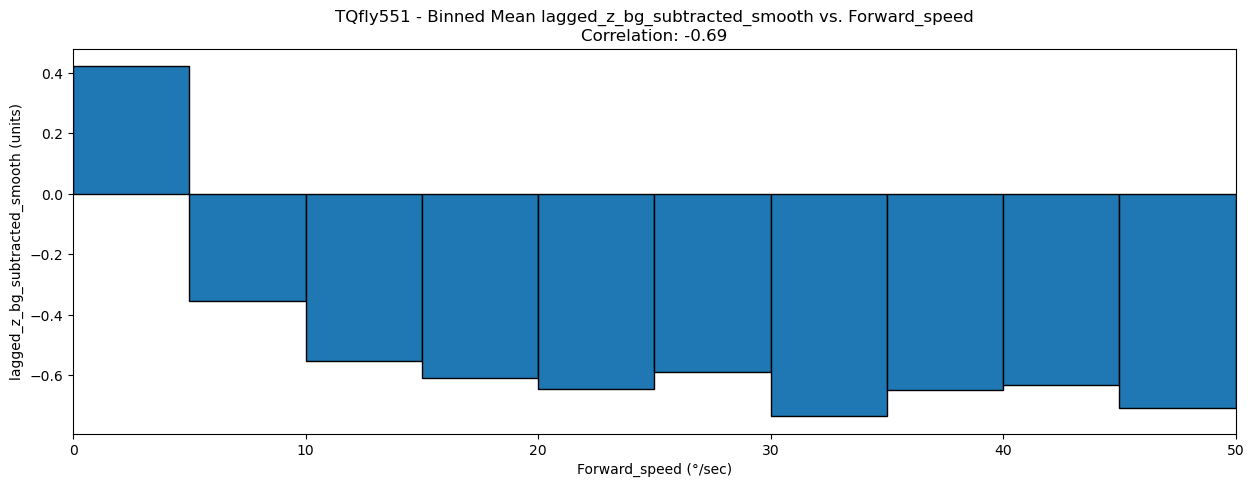

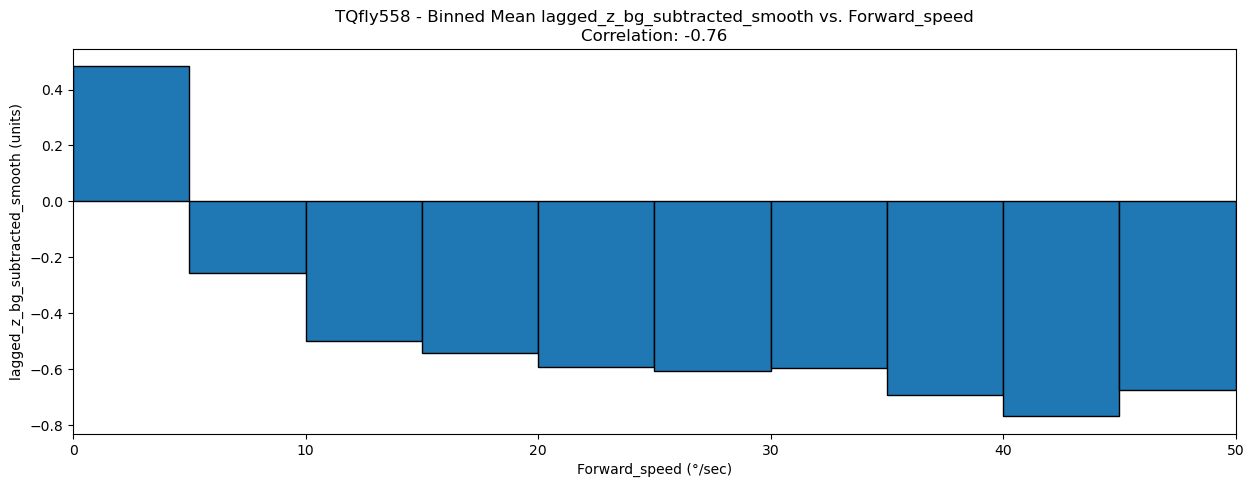

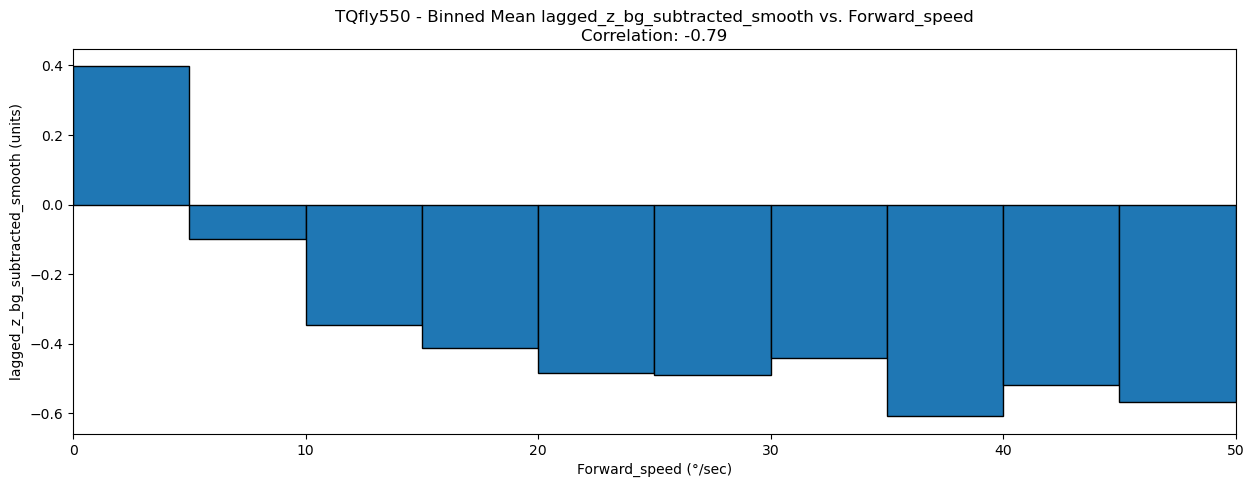

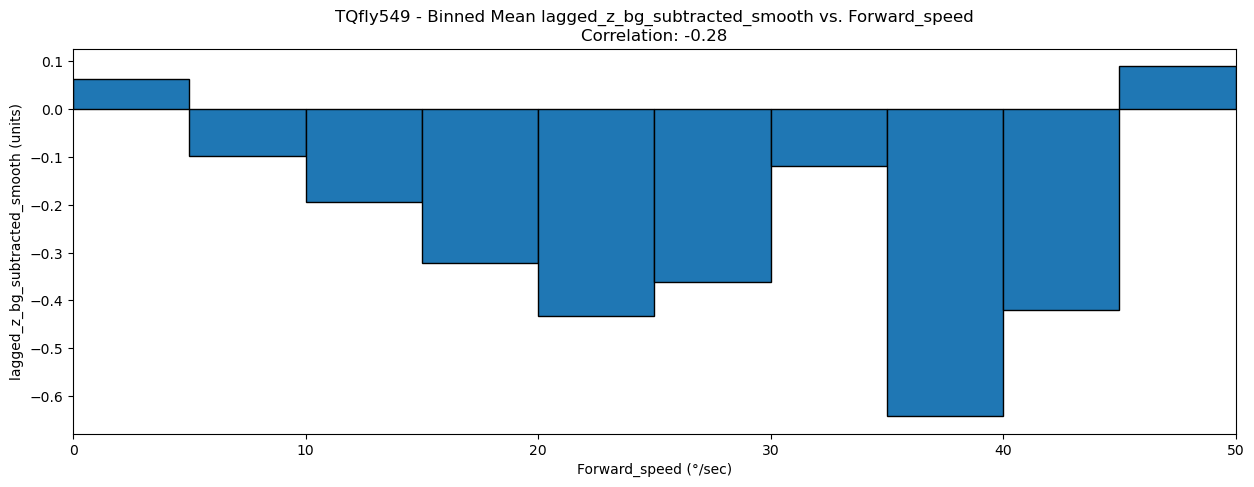

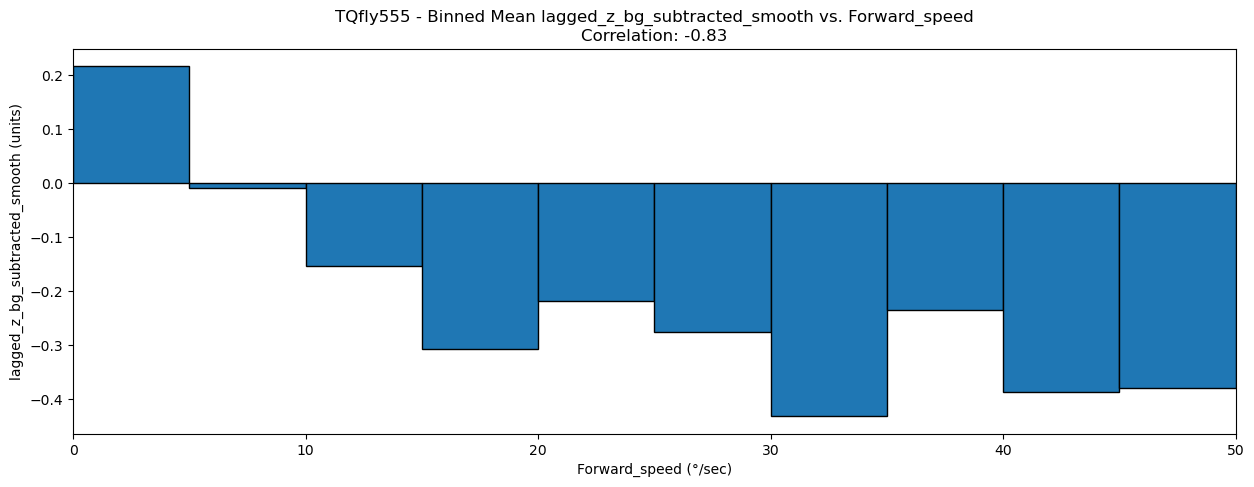

In [30]:
binned_results_df_forward = correaltion_across_speed_range(speed_correlation_data, bin_Width=5, bin_Edges_low=0, bin_Edges_up=50,x_column = 'Forward_speed',y_column='lagged_z_bg_subtracted_smooth')

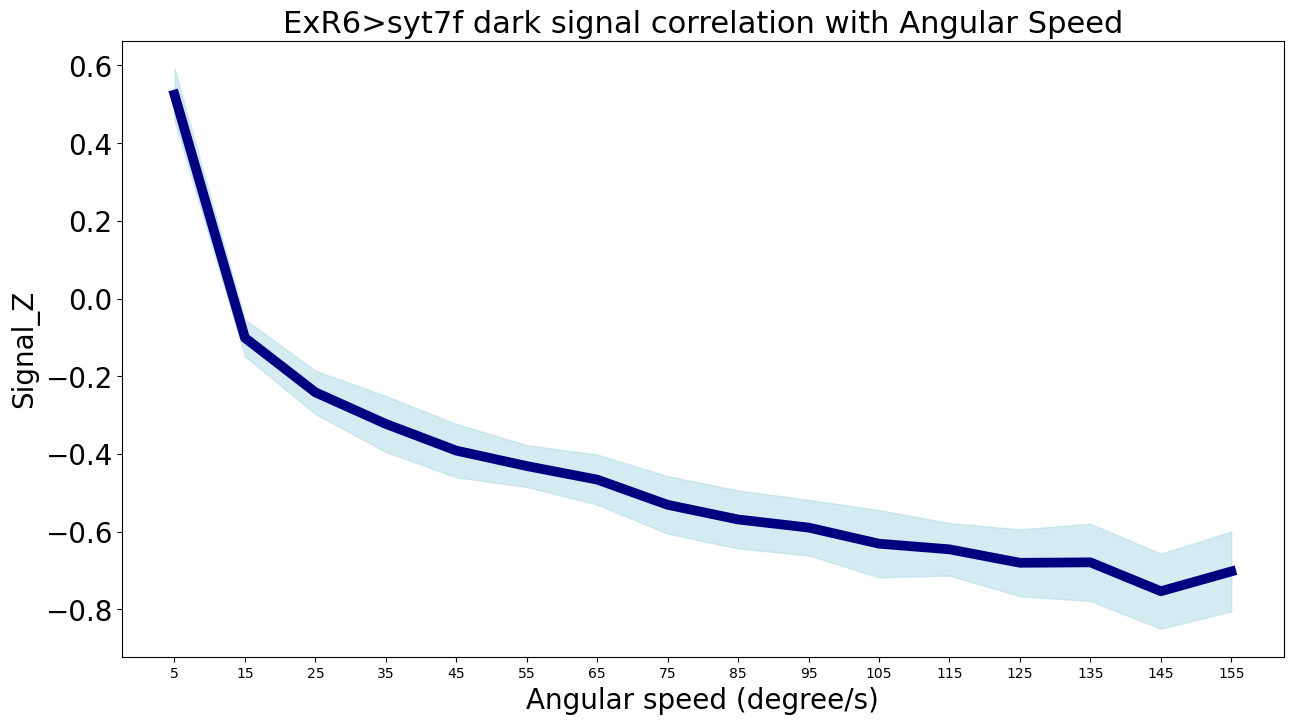

In [31]:
# Calculate mean and SEM across all flies
mean_fly_data_angular = binned_results_df_angular.mean(axis=1)
sem_fly_data_angular = binned_results_df_angular.sem(axis=1)

# Create the plot
plt.figure(figsize=(15, 8))
plt.plot(mean_fly_data_angular, linewidth=7, color='navy', label='Fly Speed Correlation (Mean)')
plt.fill_between(mean_fly_data_angular.index, mean_fly_data_angular - sem_fly_data_angular, mean_fly_data_angular + sem_fly_data_angular, color='lightblue', alpha=0.5)

# Customize the plot
plt.xticks(mean_fly_data_angular.index, size=10)
plt.yticks(size=20)
plt.xlabel('Angular speed (degree/s)', size = 20)
plt.ylabel('Signal_Z', size = 20)
plt.title('ExR6>syt7f dark signal correlation with Angular Speed', size=22)
#plt.legend()
plt.show()

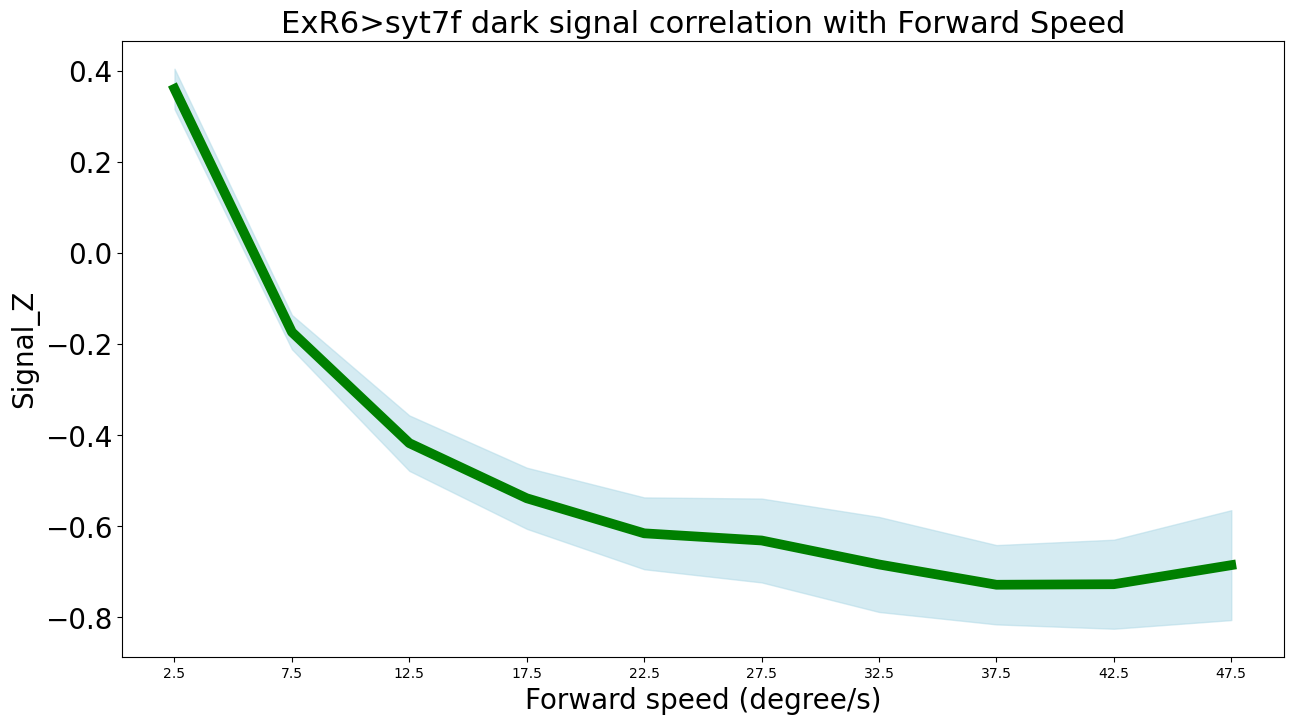

In [32]:
# Calculate mean and SEM across all flies
mean_fly_data_forward = binned_results_df_forward.mean(axis=1)
sem_fly_data_forward = binned_results_df_forward.sem(axis=1)

# Create the plot
plt.figure(figsize=(15, 8))
plt.plot(mean_fly_data_forward, linewidth=7, color='green', label='Fly Speed Correlation (Mean)')
plt.fill_between(mean_fly_data_forward.index, mean_fly_data_forward - sem_fly_data_forward, mean_fly_data_forward + sem_fly_data_forward, color='lightblue', alpha=0.5)

# Customize the plot
plt.xticks(mean_fly_data_forward.index, size=10)
plt.yticks(size=20)
plt.xlabel('Forward speed (degree/s)', size = 20)
plt.ylabel('Signal_Z', size = 20)
plt.title('ExR6>syt7f dark signal correlation with Forward Speed', size=22)
#plt.legend()
plt.show()